# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [39]:
import config
%cd {config.PROJECT_DIR}

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main


C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Imports

In [40]:
# run
from timeit import default_timer as timer
import seml

In [41]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

[04/23/25 15:12:01] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=29570;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=180120;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=161677;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=628522;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=346675;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=734909;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=616503;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=309944;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#163\163]8;;\

                    INFO     Memory Usage after loading the dataset:                        ]8;id=634745;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=86869;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=80074;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=69240;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#184\184]8;;\

                    INFO                                                                                ]8;id=915677;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=837272;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94479, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[04/23/25 15:12:10] INFO                                                                                ]8;id=318203;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=651692;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09288, loss_val: 0.42195, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/23/25 15:12:14] INFO                                                                                ]8;id=488217;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=775822;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07167, loss_val: 0.37600, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/23/25 15:12:18] INFO                                                                                ]8;id=97141;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=636615;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07151, loss_val: 0.39939, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/23/25 15:12:22] INFO                                                                                ]8;id=652132;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=432070;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06845, loss_val: 0.38217, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/23/25 15:12:27] INFO                                                                                ]8;id=166389;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=376597;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06988, loss_val: 0.36415, acc_train: 1.00000,               
                             acc_val: 0.89286                                                                      

[04/23/25 15:12:32] INFO                                                                                ]8;id=314701;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=824326;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06436, loss_val: 0.40361, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

[04/23/25 15:12:35] INFO     Test accuracy is 0.834782600402832 with seed 0                 ]8;id=188676;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=752711;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#216\216]8;;\

                    INFO     Lock 2391199386896 acquired on cache\demo.json.lock                    ]8;id=195196;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=54833;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391199386896 released on cache\demo.json.lock                    ]8;id=908078;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=947417;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

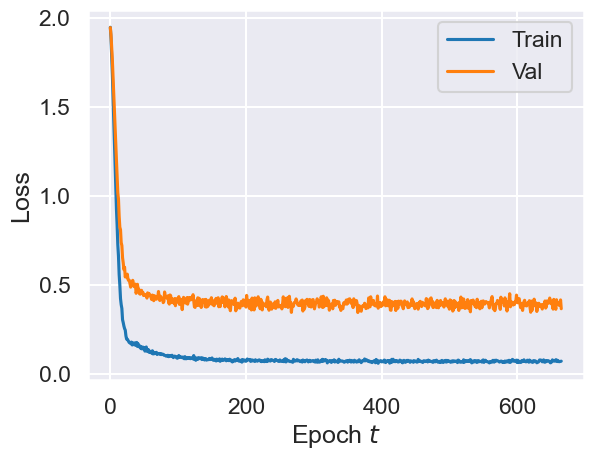

In [42]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()
"123"
plt.show()

In [43]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.48%


## 1.1 Certificate integration

In [44]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [45]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [46]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [47]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0023, -0.0189, -0.0035,  ..., -0.0007, -0.0108, -0.0372],
        [-0.0070, -0.0108,  0.0022,  ..., -0.0066,  0.0141, -0.0339],
        [-0.0054, -0.0265, -0.0035,  ..., -0.0038, -0.0105, -0.0156],
        ...,
        [-0.0097, -0.0432,  0.0009,  ..., -0.0076, -0.0051, -0.0220],
        [ 0.0114,  0.0189,  0.0013,  ...,  0.0031,  0.0030, -0.0291],
        [ 0.0093, -0.0134, -0.0022,  ...,  0.0038,  0.0085,  0.0331]],
       requires_grad=True)
GCNConv(64, 7)


In [48]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [49]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 1000
#n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0.01, #0
    'pf_minus_adj': 0.6, #0
    'pf_plus_att': 0,# 0.01
    'pf_minus_att': 0,# 0.6
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000

import torch

# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[968   0   0 ...   0  31   1]
 [900   2   0 ...   0  84  14]
 [569   0   0 ...   0 429   2]
 ...
 [883   0   0 ...   3  99  15]
 [514   0   0 ...   0 176 310]
 [809   0   0 ...   8  87  96]]


In [50]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)

print(grid_binary_class)


max_ra=3, max_rd=9, min_p_emp=0.6970



[[[1.00000000e+00 9.21734063e-01 8.70861203e-01 ... 5.17527111e-02
   3.51760247e-02 4.22923738e-03]
  [5.77312787e-01 5.62566099e-01 5.35634063e-01 ... 3.24250070e-02
   2.26722722e-02 2.78768589e-03]
  [3.49886538e-01 3.43312787e-01 3.29346099e-01 ... 2.02958546e-02
   1.45655052e-02 2.71582106e-03]
  [2.12052447e-01 2.09486538e-01 2.02444787e-01 ... 1.26922609e-02
   9.33008720e-03 2.27263090e-03]
  [1.28516635e-01 1.27812447e-01 1.24404138e-01 ... 7.93043600e-03
   5.96075004e-03 1.75996963e-03]]

 [[1.00000000e+00 7.95093401e-01 6.61904111e-01 ... 2.46545643e-03
   2.31945258e-03 1.59387224e-03]
  [5.30796474e-01 4.85814182e-01 4.08993401e-01 ... 1.51546248e-03
   1.43736010e-03 1.01083283e-03]
  [3.21694833e-01 2.96796474e-01 2.52594182e-01 ... 9.31316800e-04
   8.90296834e-04 6.39851100e-04]
  [1.94966565e-01 1.81294833e-01 1.55928474e-01 ... 5.72211675e-04
   5.51190746e-04 4.04314367e-04]
  [1.18161555e-01 1.10726565e-01 9.62124328e-02 ... 3.51500173e-04
   3.41094730e-04 2.5

In [51]:
grid_radii = (grid_binary_class>0.5)

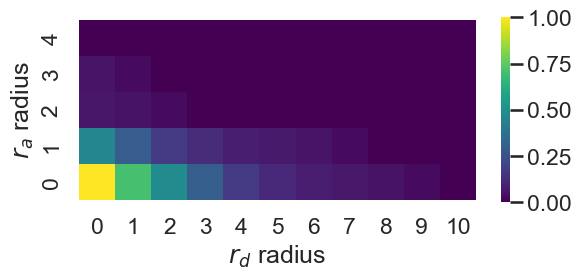

In [52]:
import seaborn as sns

heatmap = (grid_binary_class>0.5).mean(0)
sns.set_context('talk')
sns.heatmap(heatmap,
            cmap='viridis',
            vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
plt.xlim(0, heatmap.shape[1])
plt.ylim(0, heatmap.shape[0])
plt.xlabel('$r_d$ radius')
plt.ylabel('$r_a$ radius')
plt.show()

In [53]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 33.487544483985765 percent of nodes are certifiably robust


In [54]:
grid_radii_one_deletion_false = grid_radii[:,0,1]
grid_radii_one_deletion_false

array([ True,  True, False, ...,  True, False,  True])

## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack with grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics_cert = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100, #this may have to be adjusted to epochs
        search_space_size = 100, #is here the same varibale error as in global_attack ?
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii,
    use_cert=True,
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.1.1 Local PR-BCD Attack without grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 100,
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.2 Global PR-BCD Attack with Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [55]:
from DeleteCache import delete_pert_files_and_folders
# This determines whether nodes have to be drawn completely from unrobust nodes_set
# Some changes, but not significant
partly_drawn_nodes = [True]
use_certificate = ["sampling_grid_radii", "resampling", "both", "none"]
results_global_prbcd_cert = []
# Idea: Variables for sampling with or without certificate usage
# "sampling_grid_radii" = use certificates with grid_radii only in sampling
# "sampling_grid_binary_class" = use certificates with grid_binary_class only in sampling
# "resampling" = use certificates only in resampling
# "both" = use certificate in both sampling and resampling
# "none" = use no certificate
for semi in partly_drawn_nodes:
    for use_cert in use_certificate:
        
        delete_pert_files_and_folders(
        cache_dir="cache",
        pert_adj_storage_type="evasion_global_adj",
        pert_attr_storage_type="evasion_global_attr"
        )
        start = timer()
        global_prbcd_statistics_cert = experiment_global_attack_direct.run(
            data_dir = './data',
            dataset = 'cora_ml',
            attack = 'PRBCD',
            attack_params = dict(
                epochs= 50, #500
                fine_tune_epochs= 20,#25, #100,
                keep_heuristic="WeightOnly",
                search_space_size=100_000, #this may be wrong variable name (block_size?)
                block_size=50000, #100_000
                do_synchronize=True,
                loss_type="tanhMargin",
            ),
            epsilons = [0.25],
            binary_attr = False,
            make_undirected = True,
            seed=0,
            artifact_dir = 'cache',
            pert_adj_storage_type = 'evasion_global_adj',
            pert_attr_storage_type = 'evasion_global_attr',
            model_label = 'Vanilla GCN',
            model_storage_type = 'demo',
            #device = 0,
            #data_device = 0,
            device = "cpu",
            data_device = "cpu",
            debug_level = "info",
            semi = semi,
            use_cert=use_cert,
            grid_radii=grid_radii,
            grid_binary_class=grid_binary_class,
        )
        end = timer()
        time = end - start
        
        print("time: ", time)
        print(use_cert + ": ")
        print(global_prbcd_statistics_cert)
        results_global_prbcd_cert.append((use_cert, "semi:", semi, "time:", time, global_prbcd_statistics_cert))

def printItem(item):
    print(item)
    print("\n")


print("RESULTS")
[printItem(item) for item in results_global_prbcd_cert]


Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Not found: cache\evasion_global_adj
Not found: cache\evasion_global_attr


[04/23/25 15:14:39] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=382190;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=580893;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 20, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 50000, 'do_synchronize': True,             
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2391327508688 acquired on cache\demo.json.lock                    ]8;id=904068;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=812672;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391327508688 released on cache\demo.json.lock                    ]8;id=832310;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=78178;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=206571;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=778490;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2391327205968 acquired on cache\evasion_global_adj.json.lock      ]8;id=237894;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=557599;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391327205968 released on cache\evasion_global_adj.json.lock      ]8;id=817120;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=234696;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391323896080 acquired on cache\evasion_global_attr.json.lock     ]8;id=761568;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=939948;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391323896080 released on cache\evasion_global_attr.json.lock     ]8;id=152683;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=82458;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=156075;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=861980;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/23/25 15:14:40] INFO                                                                                ]8;id=333591;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=499154;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#97\97]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   


  0%|          | 0/50 [00:00<?, ?it/s]

[04/23/25 15:14:41] INFO                                                                               ]8;id=80212;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=715488;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 0 Loss: -0.6508969664573669 Accuracy: 81.225 %                                 
                                                                                                                   


 40%|████      | 20/50 [00:26<00:37,  1.26s/it]

[04/23/25 15:15:07] INFO                                                                               ]8;id=240721;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=143760;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 20 Loss: -0.24383774399757385 Accuracy: 60.356 %                               
                                                                                                                   


 58%|█████▊    | 29/50 [00:38<00:27,  1.29s/it]

[04/23/25 15:15:19] INFO     Loading search space of epoch 29 (accuarcy=0.582608699798584) for fine    ]8;id=188421;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=522931;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#164\164]8;;\
                             tuning                                                                                
                                                                                                                   


 80%|████████  | 40/50 [00:51<00:12,  1.28s/it]

[04/23/25 15:15:33] INFO                                                                               ]8;id=157577;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=68176;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 40 Loss: -0.1801464557647705 Accuracy: 57.668 %                                
                                                                                                                   


100%|██████████| 50/50 [01:03<00:00,  1.27s/it]


[04/23/25 15:15:44] INFO     2-th sampling: too many samples 2000.0                                    ]8;id=284548;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=540765;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:15:45] INFO     5-th sampling: too many samples 2021.0                                    ]8;id=553248;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=315512;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     6-th sampling: too many samples 2002.0                                    ]8;id=777618;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=604139;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     7-th sampling: too many samples 2013.0                                    ]8;id=939930;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=992818;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     8-th sampling: too many samples 2010.0                                    ]8;id=240016;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=469134;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     9-th sampling: too many samples 1999.0                                    ]8;id=194857;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=627988;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     10-th sampling: too many samples 2002.0                                   ]8;id=142773;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=915486;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     11-th sampling: too many samples 1999.0                                   ]8;id=372948;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=298734;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     12-th sampling: too many samples 2044.0                                   ]8;id=201758;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=742629;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:15:46] INFO     15-th sampling: too many samples 2062.0                                   ]8;id=294765;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=174834;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     16-th sampling: too many samples 2026.0                                   ]8;id=81155;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=851114;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     17-th sampling: too many samples 2025.0                                   ]8;id=601709;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=775516;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     18-th sampling: too many samples 2016.0                                   ]8;id=564263;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=83697;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     19-th sampling: too many samples 1996.0                                   ]8;id=718584;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=172845;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     Lock 2391133983568 acquired on cache\evasion_global_adj.json.lock      ]8;id=466155;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=86033;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391133983568 released on cache\evasion_global_adj.json.lock      ]8;id=644020;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=403964;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391133983568 acquired on cache\evasion_global_attr.json.lock     ]8;id=100735;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=547692;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391133983568 released on cache\evasion_global_attr.json.lock     ]8;id=578427;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=821532;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  67.09930579992943
sampling_grid_radii: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5727272629737854}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


                    INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=481191;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=907922;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 20, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 50000, 'do_synchronize': True,             
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2391133400400 acquired on cache\demo.json.lock                    ]8;id=641836;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=272391;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391133400400 released on cache\demo.json.lock                    ]8;id=415954;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=623431;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=694555;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=546075;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2391324902992 acquired on cache\evasion_global_adj.json.lock      ]8;id=672375;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=574855;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391324902992 released on cache\evasion_global_adj.json.lock      ]8;id=337582;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=29800;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391133400400 acquired on cache\evasion_global_attr.json.lock     ]8;id=286210;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=129517;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391133400400 released on cache\evasion_global_attr.json.lock     ]8;id=507293;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=127279;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=510427;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=414223;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/23/25 15:15:47] INFO                                                                                ]8;id=819368;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=205065;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#97\97]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   


  0%|          | 0/50 [00:00<?, ?it/s]

[04/23/25 15:15:48] INFO                                                                               ]8;id=619677;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=949829;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 0 Loss: -0.6508982181549072 Accuracy: 81.225 %                                 
                                                                                                                   


 40%|████      | 20/50 [00:26<00:39,  1.33s/it]

[04/23/25 15:16:14] INFO                                                                               ]8;id=411005;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=901082;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 20 Loss: -0.2720617949962616 Accuracy: 61.739 %                                
                                                                                                                   


 58%|█████▊    | 29/50 [00:38<00:26,  1.25s/it]

[04/23/25 15:16:26] INFO     Loading search space of epoch 29 (accuarcy=0.5976284742355347) for fine   ]8;id=495267;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=933786;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#164\164]8;;\
                             tuning                                                                                
                                                                                                                   


 80%|████████  | 40/50 [00:52<00:12,  1.27s/it]

[04/23/25 15:16:41] INFO                                                                               ]8;id=857279;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=356853;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 40 Loss: -0.2047545462846756 Accuracy: 58.854 %                                
                                                                                                                   


100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


[04/23/25 15:16:53] INFO     1-th sampling: too many samples 2036.0                                    ]8;id=33679;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=245497;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:16:54] INFO     4-th sampling: too many samples 2003.0                                    ]8;id=196108;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=596231;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:16:56] INFO     10-th sampling: too many samples 2018.0                                   ]8;id=361419;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=196488;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     13-th sampling: too many samples 2053.0                                   ]8;id=580534;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=86021;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     14-th sampling: too many samples 1996.0                                   ]8;id=637951;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=764818;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:16:57] INFO     16-th sampling: too many samples 2028.0                                   ]8;id=74275;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=339160;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     18-th sampling: too many samples 2003.0                                   ]8;id=356890;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=789514;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:16:58] INFO     Lock 2391319063824 acquired on cache\evasion_global_adj.json.lock      ]8;id=73225;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=914233;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391319063824 released on cache\evasion_global_adj.json.lock      ]8;id=86692;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=509320;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391319063824 acquired on cache\evasion_global_attr.json.lock     ]8;id=186940;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=679556;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391319063824 released on cache\evasion_global_attr.json.lock     ]8;id=515588;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=194573;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  71.96259710006416
resampling: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5853754878044128}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


                    INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=953056;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=414585;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 20, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 50000, 'do_synchronize': True,             
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2391216595472 acquired on cache\demo.json.lock                    ]8;id=874881;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=481284;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391216595472 released on cache\demo.json.lock                    ]8;id=805498;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=223249;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=497049;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=470043;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2391327655632 acquired on cache\evasion_global_adj.json.lock      ]8;id=266521;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=872965;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391327655632 released on cache\evasion_global_adj.json.lock      ]8;id=475531;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=520633;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391216595472 acquired on cache\evasion_global_attr.json.lock     ]8;id=841270;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=545567;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391216595472 released on cache\evasion_global_attr.json.lock     ]8;id=912746;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=679781;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=787817;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=37832;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/23/25 15:16:59] INFO                                                                                ]8;id=608617;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=319490;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#97\97]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   


  0%|          | 0/50 [00:00<?, ?it/s]

[04/23/25 15:17:00] INFO                                                                               ]8;id=389149;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=933537;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 0 Loss: -0.6508969664573669 Accuracy: 81.225 %                                 
                                                                                                                   


 40%|████      | 20/50 [00:25<00:41,  1.38s/it]

[04/23/25 15:17:25] INFO                                                                               ]8;id=71725;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=367174;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 20 Loss: -0.26870670914649963 Accuracy: 61.462 %                               
                                                                                                                   


 58%|█████▊    | 29/50 [00:39<00:31,  1.48s/it]

[04/23/25 15:17:39] INFO     Loading search space of epoch 29 (accuarcy=0.596442699432373) for fine    ]8;id=535276;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=483654;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#164\164]8;;\
                             tuning                                                                                
                                                                                                                   


 80%|████████  | 40/50 [00:53<00:12,  1.27s/it]

[04/23/25 15:17:53] INFO                                                                               ]8;id=71612;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=785442;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 40 Loss: -0.20472769439220428 Accuracy: 58.656 %                               
                                                                                                                   


100%|██████████| 50/50 [01:08<00:00,  1.37s/it]


[04/23/25 15:18:08] INFO     3-th sampling: too many samples 2026.0                                    ]8;id=129240;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=885681;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:18:09] INFO     5-th sampling: too many samples 2015.0                                    ]8;id=47488;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=520079;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     6-th sampling: too many samples 2041.0                                    ]8;id=138591;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=218453;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     8-th sampling: too many samples 2011.0                                    ]8;id=243459;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=462750;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:18:10] INFO     10-th sampling: too many samples 2053.0                                   ]8;id=778439;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=629514;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     11-th sampling: too many samples 2052.0                                   ]8;id=783591;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=966682;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     12-th sampling: too many samples 2012.0                                   ]8;id=99202;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=943706;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     13-th sampling: too many samples 1999.0                                   ]8;id=658843;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=428160;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:18:11] INFO     17-th sampling: too many samples 2031.0                                   ]8;id=509727;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=554171;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     18-th sampling: too many samples 1999.0                                   ]8;id=714427;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=768579;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:18:12] INFO     Lock 2391327041424 acquired on cache\evasion_global_adj.json.lock      ]8;id=56854;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=708986;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391327041424 released on cache\evasion_global_adj.json.lock      ]8;id=330476;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=572838;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391327386896 acquired on cache\evasion_global_attr.json.lock     ]8;id=277757;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=331951;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391327386896 released on cache\evasion_global_attr.json.lock     ]8;id=488278;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=71028;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  74.26655479997862
both: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5849802494049072}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


                    INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=87713;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=272877;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 20, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 50000, 'do_synchronize': True,             
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2391279353424 acquired on cache\demo.json.lock                    ]8;id=400813;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=116852;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391279353424 released on cache\demo.json.lock                    ]8;id=295321;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=235190;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=331066;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=523126;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2391326813712 acquired on cache\evasion_global_adj.json.lock      ]8;id=616475;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=7749;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391326813712 released on cache\evasion_global_adj.json.lock      ]8;id=309094;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=888176;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391279353424 acquired on cache\evasion_global_attr.json.lock     ]8;id=200505;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=272068;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391279353424 released on cache\evasion_global_attr.json.lock     ]8;id=355893;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=228570;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=787768;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=876664;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/23/25 15:18:13] INFO                                                                                ]8;id=488672;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=735906;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#97\97]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   


  0%|          | 0/50 [00:00<?, ?it/s]

[04/23/25 15:18:15] INFO                                                                               ]8;id=361947;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=747784;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 0 Loss: -0.6508982181549072 Accuracy: 81.225 %                                 
                                                                                                                   


 40%|████      | 20/50 [00:29<00:46,  1.54s/it]

[04/23/25 15:18:44] INFO                                                                               ]8;id=502130;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=7622;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 20 Loss: -0.256080687046051 Accuracy: 60.949 %                                 
                                                                                                                   


 58%|█████▊    | 29/50 [00:41<00:25,  1.19s/it]

[04/23/25 15:18:55] INFO     Loading search space of epoch 29 (accuarcy=0.5932806134223938) for fine   ]8;id=952452;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=925982;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#164\164]8;;\
                             tuning                                                                                
                                                                                                                   


 80%|████████  | 40/50 [00:58<00:15,  1.58s/it]

[04/23/25 15:19:13] INFO                                                                               ]8;id=787223;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=278466;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#143\143]8;;\
                             Epoch: 40 Loss: -0.18798744678497314 Accuracy: 57.984 %                               
                                                                                                                   


100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


[04/23/25 15:19:29] INFO     1-th sampling: too many samples 2038.0                                    ]8;id=63534;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=752051;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:19:30] INFO     4-th sampling: too many samples 2025.0                                    ]8;id=769102;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=201354;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     5-th sampling: too many samples 2028.0                                    ]8;id=193742;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=813183;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     6-th sampling: too many samples 2059.0                                    ]8;id=427639;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=108032;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     7-th sampling: too many samples 2012.0                                    ]8;id=241877;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=143096;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:19:31] INFO     10-th sampling: too many samples 2032.0                                   ]8;id=30926;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=400345;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     11-th sampling: too many samples 2032.0                                   ]8;id=126157;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=660957;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     12-th sampling: too many samples 2025.0                                   ]8;id=133812;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=71489;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:19:32] INFO     15-th sampling: too many samples 2009.0                                   ]8;id=111138;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=767180;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     16-th sampling: too many samples 2005.0                                   ]8;id=202386;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=469236;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     17-th sampling: too many samples 2001.0                                   ]8;id=952233;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=215243;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

[04/23/25 15:19:33] INFO     19-th sampling: too many samples 2019.0                                   ]8;id=513792;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=177130;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#212\212]8;;\

                    INFO     Lock 2391326844816 acquired on cache\evasion_global_adj.json.lock      ]8;id=199583;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=799330;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391326844816 released on cache\evasion_global_adj.json.lock      ]8;id=505576;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=211616;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2391326844816 acquired on cache\evasion_global_attr.json.lock     ]8;id=621122;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=414691;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2391326844816 released on cache\evasion_global_attr.json.lock     ]8;id=661316;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=306178;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  81.32015689997934
none: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5790513753890991}]}
RESULTS
('sampling_grid_radii', 'semi:', True, 'time:', 67.09930579992943, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5727272629737854}]})


('resampling', 'semi:', True, 'time:', 71.96259710006416, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5853754878044128}]})


('both', 'semi:', True, 'time:', 74.26655479997862, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5849802494049072}]})


('none', 'semi:', True, 'time:', 81.32015689997934, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.5790513753890991}]})



[None, None, None, None]

### 2.2.1 Global PR-BCD Attack without Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [67]:
from DeleteCache import delete_pert_files_and_folders

delete_pert_files_and_folders(
    cache_dir="cache",
    pert_adj_storage_type="evasion_global_adj",
    pert_attr_storage_type="evasion_global_attr"
)

global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=50,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        block_size=2000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
)

print(global_prbcd_statistics)

Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/04/25 18:08:49] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=459632;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=492268;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 100, 'keep_heuristic': 'WeightOnly',                              
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 1487087321488 acquired on cache\demo.json.lock                    ]8;id=565504;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=40306;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487087321488 released on cache\demo.json.lock                    ]8;id=174300;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=756213;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=232461;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=88024;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 1487050451088 acquired on cache\evasion_global_adj.json.lock      ]8;id=291200;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=861081;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050451088 released on cache\evasion_global_adj.json.lock      ]8;id=833123;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=147354;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487050874128 acquired on cache\evasion_global_attr.json.lock     ]8;id=909421;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=902959;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050874128 released on cache\evasion_global_attr.json.lock     ]8;id=416682;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=455492;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=76317;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=953193;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

                    INFO                                                                                ]8;id=133528;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=665009;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   



  0%|          | 0/50 [00:00<?, ?it/s]

[04/04/25 18:08:51] INFO                                                                               ]8;id=951232;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=757698;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 83.360 %                                 
                                                                                                                   



  2%|▏         | 1/50 [00:01<01:07,  1.38s/it]

  4%|▍         | 2/50 [00:02<01:08,  1.42s/it]

  6%|▌         | 3/50 [00:03<01:02,  1.32s/it]

  8%|▊         | 4/50 [00:05<00:57,  1.26s/it]

 10%|█         | 5/50 [00:06<00:53,  1.19s/it]

 12%|█▏        | 6/50 [00:07<00:50,  1.15s/it]

 14%|█▍        | 7/50 [00:08<00:48,  1.13s/it]

 16%|█▌        | 8/50 [00:09<00:46,  1.12s/it]

 18%|█▊        | 9/50 [00:10<00:45,  1.11s/it]

 20%|██        | 10/50 [00:11<00:43,  1.09s/it]

 22%|██▏       | 11/50 [00:12<00:42,  1.08s/it]

 24%|██▍       | 12/50 [00:13<00:41,  1.10s/it]

 26%|██▌       | 13/50 [00:14<00:41,  1.13s/it]

 28%|██▊       | 14/50 [00:16<00:41,  1.16s/it]

 30%|███       | 15/50 [00:17<00:40,  1.15s/it]

 32%|███▏      | 16/50 [00:18<00:38,  1.12s/it]

 34%|███▍      | 17/50 [00:19<00:36,  1.10s/it]

 36%|███▌      | 18/50 [00:20<00:35,  1.11s/it]

 38%|███▊      | 19/50 [00:21<00:34,  1.10s/it]

 40%|████      | 20/50 [00:22<00:33,  1.11s/it]

[04/04/25 18:09:13] INFO                                                                               ]8;id=399107;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=969573;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.6247091889381409 Accuracy: 81.423 %                                
                                                                                                                   



 42%|████▏     | 21/50 [00:23<00:32,  1.14s/it]

 44%|████▍     | 22/50 [00:25<00:36,  1.32s/it]

 46%|████▌     | 23/50 [00:27<00:36,  1.35s/it]

 48%|████▊     | 24/50 [00:28<00:33,  1.30s/it]

 50%|█████     | 25/50 [00:29<00:31,  1.27s/it]

 52%|█████▏    | 26/50 [00:30<00:30,  1.26s/it]

 54%|█████▍    | 27/50 [00:31<00:28,  1.24s/it]

 56%|█████▌    | 28/50 [00:33<00:26,  1.22s/it]

 58%|█████▊    | 29/50 [00:34<00:24,  1.19s/it]

 60%|██████    | 30/50 [00:35<00:23,  1.16s/it]

 62%|██████▏   | 31/50 [00:36<00:21,  1.14s/it]

 64%|██████▍   | 32/50 [00:37<00:20,  1.13s/it]

 66%|██████▌   | 33/50 [00:38<00:18,  1.11s/it]

 68%|██████▊   | 34/50 [00:39<00:17,  1.10s/it]

 70%|███████   | 35/50 [00:40<00:16,  1.09s/it]

 72%|███████▏  | 36/50 [00:41<00:15,  1.08s/it]

 74%|███████▍  | 37/50 [00:42<00:14,  1.09s/it]

 76%|███████▌  | 38/50 [00:43<00:12,  1.08s/it]

 78%|███████▊  | 39/50 [00:45<00:11,  1.09s/it]

 80%|████████  | 40/50 [00:46<00:11,  1.12s/it]

[04/04/25 18:09:37] INFO                                                                               ]8;id=406531;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=580994;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.6125603318214417 Accuracy: 80.435 %                                
                                                                                                                   



 82%|████████▏ | 41/50 [00:47<00:10,  1.16s/it]

 84%|████████▍ | 42/50 [00:48<00:09,  1.21s/it]

 86%|████████▌ | 43/50 [00:49<00:08,  1.18s/it]

 88%|████████▊ | 44/50 [00:50<00:06,  1.14s/it]

 90%|█████████ | 45/50 [00:51<00:05,  1.11s/it]

 92%|█████████▏| 46/50 [00:53<00:04,  1.10s/it]

 94%|█████████▍| 47/50 [00:54<00:03,  1.10s/it]

 96%|█████████▌| 48/50 [00:55<00:02,  1.09s/it]

 98%|█████████▊| 49/50 [00:56<00:01,  1.09s/it]

100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


[04/04/25 18:09:55] INFO     Lock 1487050370640 acquired on cache\evasion_global_adj.json.lock      ]8;id=509654;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=474924;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050370640 released on cache\evasion_global_adj.json.lock      ]8;id=90462;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=618258;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487051653200 acquired on cache\evasion_global_attr.json.lock     ]8;id=121553;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=597870;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487051653200 released on cache\evasion_global_attr.json.lock     ]8;id=637321;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=739017;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.8007904887199402}]}


In [68]:
perturbed_acc_cert = global_prbcd_statistics_cert["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack with cert: {100*perturbed_acc_cert:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack with cert: 82.09%


In [69]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack: 80.08%
